# **The Entreprenuership Network**

#**CORE TASK 6 - Create a house price prediction project.**

**Author Name : Teena Joseph(MSC DA), Rajagiri College of Social Sciences**

**We import the main libraries.**

In [ ]:
#import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

**resize our plots**

In [ ]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


**Let's drop the 'id' column. Not important for our work here.**

In [ ]:
df.drop('id',inplace=True,axis=1)

**Let's see with what we're dealing with.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**Now, I'll transform the 'date' column in a usefull column, spliting it in a Year column and Month column.**

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)

**result.**

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [ ]:
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('date',inplace=True,axis=1)

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

**visualizations with distplot**

<AxesSubplot:xlabel='price', ylabel='Count'>

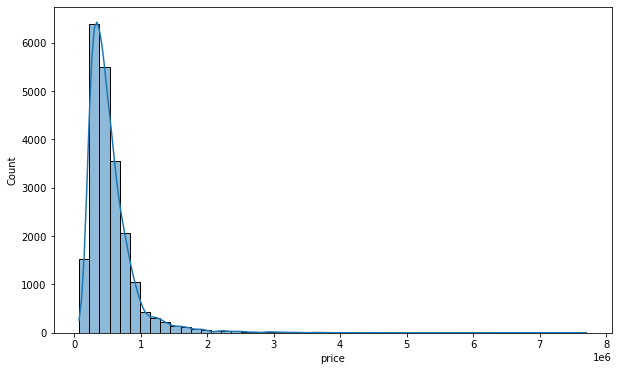

In [ ]:
resizeplot(10,6)
sns.histplot(df['price'],kde=True,bins=50)

**Few correlated features.**

<AxesSubplot:>

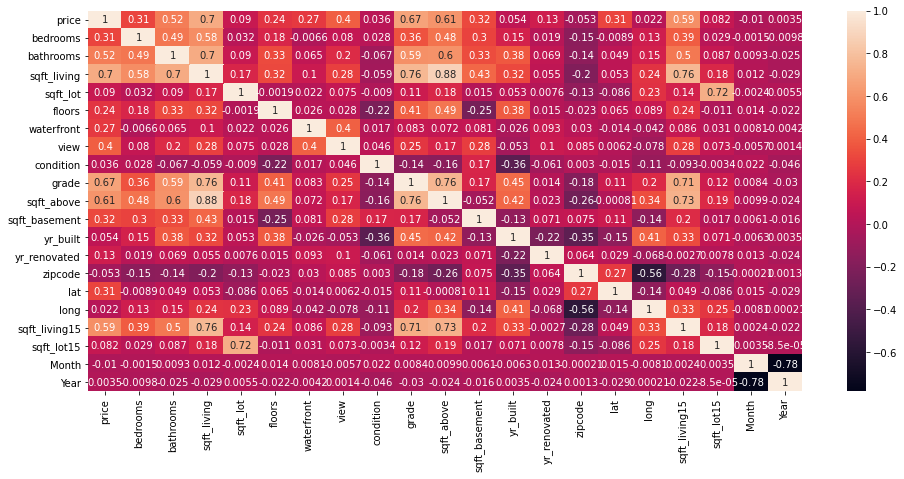

In [ ]:
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)

**see how the price changed along the years.**

<AxesSubplot:xlabel='yr_built', ylabel='price'>

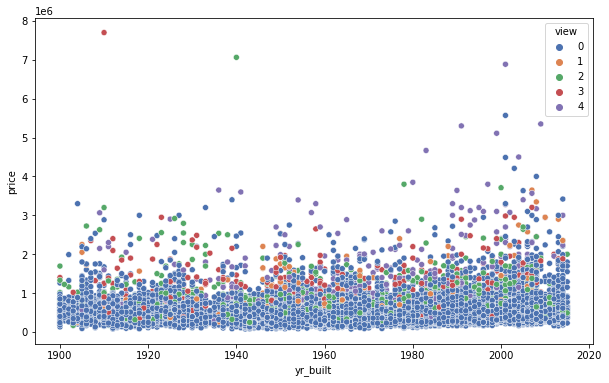

In [ ]:
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')

**there is a much more residences without a View than the others.**

<AxesSubplot:xlabel='view', ylabel='count'>

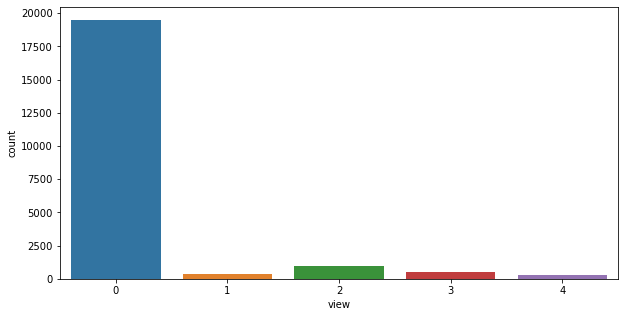

In [ ]:
resizeplot(10,5)
sns.countplot(x='view',data=df)

<AxesSubplot:xlabel='waterfront', ylabel='count'>

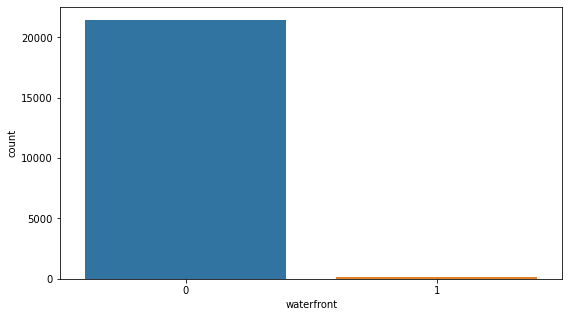

In [ ]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=df)

**A linear analysis showing us the increase of the price along the years.**

<AxesSubplot:xlabel='Year', ylabel='price'>

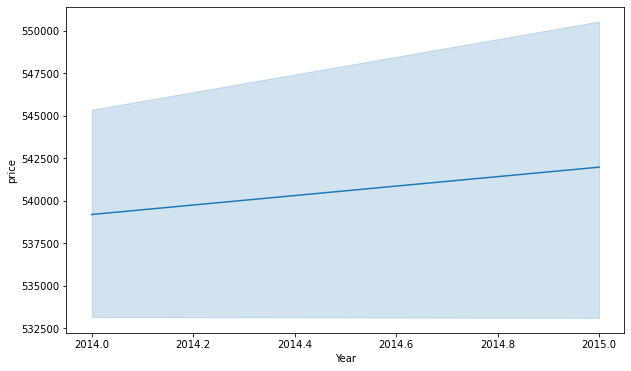

In [ ]:
resizeplot(10,6)
sns.lineplot(x='Year',y='price',data=df)

**The higher the grade the higher the price.
Note that, the price does not vary much between 2 and 6,
probably due to the similarity of the houses.**

<AxesSubplot:xlabel='grade', ylabel='price'>

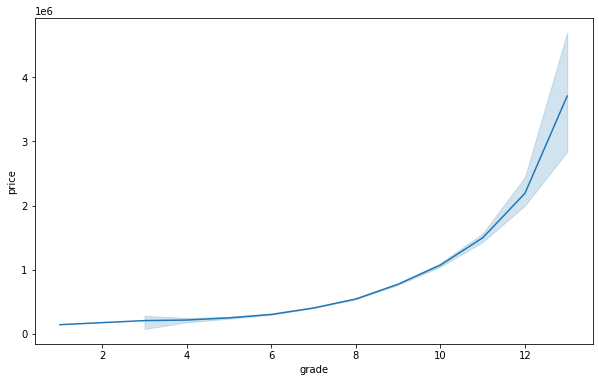

In [ ]:
resizeplot(10,6)
sns.lineplot(x='grade',y='price',data=df,palette='terrain')

<AxesSubplot:xlabel='grade', ylabel='price'>

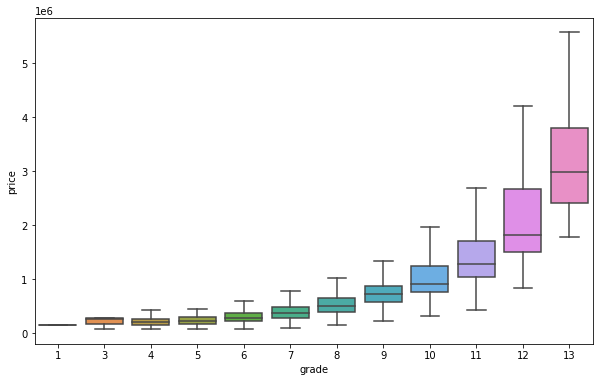

In [ ]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=df,showfliers=False)

<Figure size 720x432 with 0 Axes>

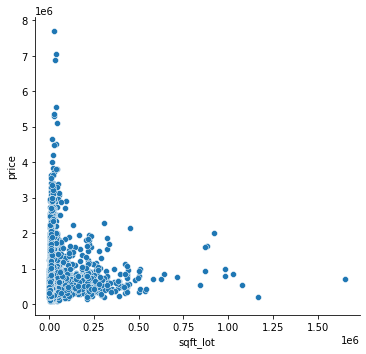

In [ ]:
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=df,palette='terrain')

**Analysis relating the number of rooms with a view to the price of the property.**

In [ ]:
print('Mean of 1 room with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==1)]['price'].mean())

Mean of 1 room with view:  622680.0


In [ ]:
print('Mean of 1 room without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==1)]['price'].mean())

Mean of 1 room without view:  309781.1030927835


In [ ]:
print('Mean of 2 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==2)]['price'].mean())

Mean of 2 rooms with view:  918567.4838709678


In [ ]:
print('Mean of 2 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==2)]['price'].mean())

Mean of 2 rooms without view:  395497.62183950166


In [ ]:
print('Mean of 3 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==3)]['price'].mean())

Mean of 3 rooms with view:  1526424.21875


In [ ]:
print('Mean of 3 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==3)]['price'].mean())

Mean of 3 rooms without view:  459259.17501793214


In [ ]:
print('Mean of 4 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==4)]['price'].mean())

Mean of 4 rooms with view:  1928485.0


In [ ]:
print('Mean of 4 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==4)]['price'].mean())

Mean of 4 rooms without view:  627880.810992545


**Relating the number of bathrooms with the price.**

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

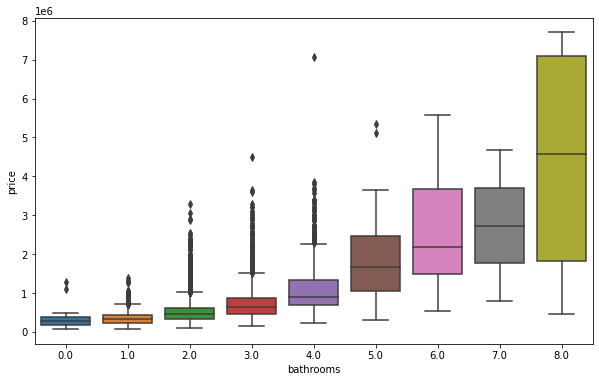

In [ ]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)

**Eesidences have more houses with 3 and 4 bedrooms than the others, which leads us to realize that there are several other attributes that value the house and not just bedrooms and bathrooms.**

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

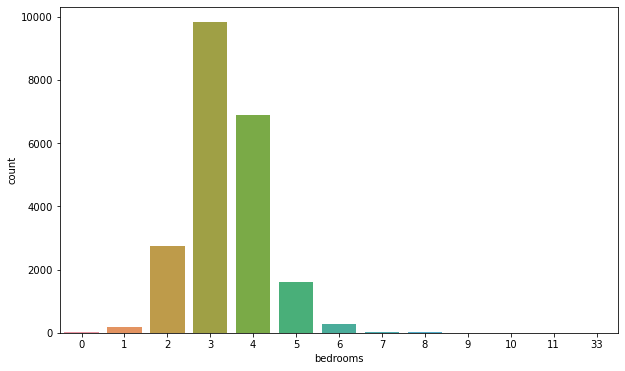

In [ ]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=df)

# Let's start creating our models

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

In [ ]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**Normalize the data.**

In [ ]:
std = StandardScaler()

In [ ]:
X = std.fit_transform(X)

**RANDOM FOREST REGRESSOR**

In [ ]:
rfr = RandomForestRegressor(n_estimators=200)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
score_rfr = rfr.score(X_train,y_train)

In [ ]:
prev_rfr = rfr.predict(X_test)

In [ ]:
mae_rfr = mean_absolute_error(y_test,prev_rfr)

In [ ]:
mse_rfr = mean_squared_error(y_test,prev_rfr)

In [ ]:
rmse_rfr = np.sqrt(mean_squared_error(y_test,prev_rfr))

In [ ]:
print('Mae: ',mae_rfr)
print('Mse: ',mse_rfr)
print('Rmse: ',rmse_rfr)

Mae:  124231.36088374397
Mse:  37912647022.48658
Rmse:  194711.70232548064


In [ ]:
print(score_rfr)

0.9584837732427094


In [ ]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr.head()

,Price,Predictions,Error
0,221900.0,335180.230,-113280.230
1,538000.0,636826.300,-98826.300
2,180000.0,318844.030,-138844.030
3,604000.0,456245.430,147754.570
4,510000.0,667843.695,-157843.695


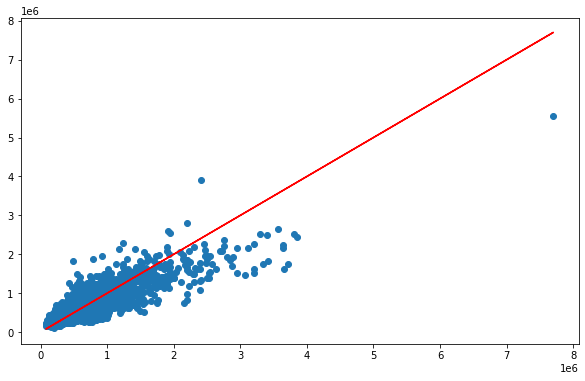

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='red')

**LINEAR REGRESSION**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred_lr = lr.predict(X_test)

In [ ]:
score_lr = lr.score(X_train,y_train)

In [ ]:
print(score_lr)

0.6065075278674394


In [ ]:
lr.coef_[0]

-20757.990124204305

In [ ]:
lr.intercept_

-678182.8989128264

In [ ]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [ ]:
print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

Mae_lr:  153161.5652134555
Mse_lr:  54824397535.26486
Rmse_lr:  234146.10296834935


In [ ]:
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,333194.535835,-111294.535835
1,538000.0,646143.675916,-108143.675916
2,180000.0,148119.323809,31880.676191
3,604000.0,605687.857613,-1687.857613
4,510000.0,652832.231348,-142832.231348


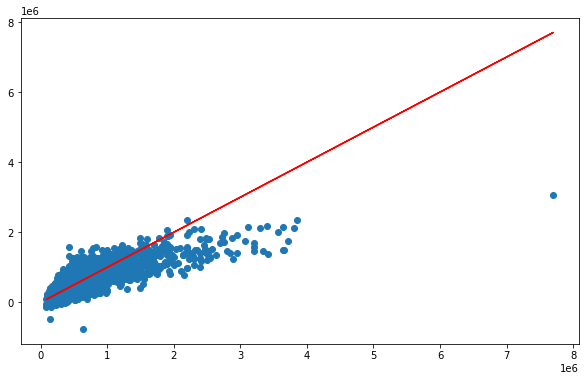

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')

**POLYNOMIAL REGRESSION**

In [ ]:
poly = PolynomialFeatures(degree=4)

In [ ]:
X_train_poly = poly.fit_transform(X_train)

In [ ]:
X_test_poly = poly.transform(X_test)

In [ ]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
score_poly = lr.score(X_train_poly,y_train)

In [ ]:
print(score_poly)

0.7565184621922203


In [ ]:
pred_poly = lr.predict(X_test_poly)

In [ ]:
pred_poly[0]

378487.44330813887

In [ ]:
mae_poly = mean_absolute_error(y_test,pred_poly)
mse_poly = mean_squared_error(y_test,pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test,pred_poly))

In [ ]:
print('Mae_poly:',mae_poly)
print('Mse_poly:',mse_poly)
print('Rmse_poly:',rmse_poly)

Mae_poly: 730986.9009793977
Mse_poly: 955898916590599.2
Rmse_poly: 30917614.988717988


**DECISION TREE REGRESSOR**

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
pred_dtr = dtr.predict(X_test)

In [ ]:
score_dtr = dtr.score(X_train,y_train)

In [ ]:
print(score_dtr)

0.9993665112324681


In [ ]:
mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

In [ ]:
print('Mae_dtr: ',mae_dtr)
print('Mse_dtr: ',mse_dtr)
print('Rmse_dtr: ',rmse_dtr)

Mae_dtr:  168671.58878264442
Mse_dtr:  70711451410.27277
Rmse_dtr:  265916.24886469945


In [ ]:
price_dtr = df['price']
predict_dtr = pd.Series(pred_dtr)
error_dtr = price_dtr-predict_dtr
data_dtr = {'Price':price_dtr,'Predictions':predict_dtr,'Error':error_dtr}
data_prev_dtr = pd.DataFrame(data_dtr)
data_prev_dtr.head()

,Price,Predictions,Error
0,221900.0,410000.0,-188100.0
1,538000.0,600000.0,-62000.0
2,180000.0,290000.0,-110000.0
3,604000.0,400000.0,204000.0
4,510000.0,612000.0,-102000.0


In [ ]:
data_prev_dtr['Percentage_error'] = np.abs(data_prev_dtr['Error'])*100/data_prev_dtr['Price']

In [ ]:
data_prev_dtr.head()

,Price,Predictions,Error,Percentage_error
0,221900.0,410000.0,-188100.0,84.767913
1,538000.0,600000.0,-62000.0,11.524164
2,180000.0,290000.0,-110000.0,61.111111
3,604000.0,400000.0,204000.0,33.774834
4,510000.0,612000.0,-102000.0,20.000000


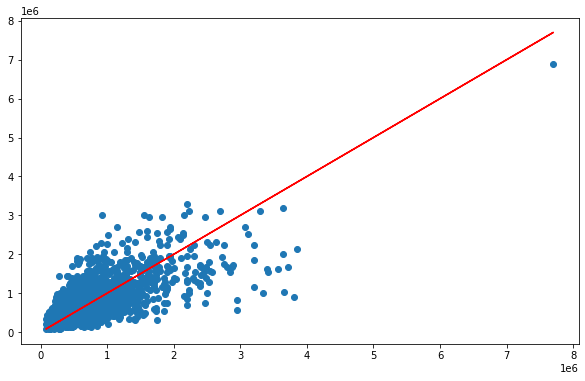

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_dtr)
plt.plot(y_test,y_test,color='red')

> **KNN REGRESSOR**

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 10)

In [ ]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
score_knr = knr.score(X_train,y_train)

In [ ]:
print(score_knr)

0.5900434125593885


In [ ]:
pred_knr = knr.predict(X_test)

In [ ]:
mae_knr = mean_absolute_error(y_test,pred_knr)
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)

In [ ]:
print('Mae_knr: ',mae_knr)
print('Mse_knr: ',mse_knr)
print('Rmse_knr: ',rmse_knr)

Mae_knr:  156100.87049660704
Mse_knr:  69166272053.38312
Rmse_knr:  262994.8137385662


In [ ]:
price_knr = df['price']
predict_knr = pd.Series(pred_knr)
error_knr = price_dtr-predict_knr
data_knr = {'Price':price_knr,'Predictions':predict_knr,'Error':error_knr}
data_prev_knr = pd.DataFrame(data_knr)
data_prev_knr.head()

,Price,Predictions,Error
0,221900.0,383045.0,-161145.0
1,538000.0,502437.5,35562.5
2,180000.0,759160.0,-579160.0
3,604000.0,450965.0,153035.0
4,510000.0,420800.0,89200.0


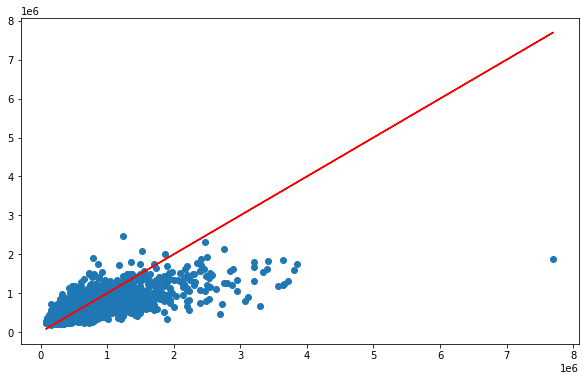

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_knr)
plt.plot(y_test,y_test,color='red')

**XGBOOST**

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred_xgb = xgb.predict(X_test)

In [ ]:
score_xgb = xgb.score(X_train,y_train)

In [ ]:
print(score_xgb)

0.9023726183249473


In [ ]:
mae_xgb = mean_absolute_error(y_test,pred_xgb)
mse_xgb = mean_squared_error(y_test,pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))

In [ ]:
print('Mae_xgb: ',mae_xgb)
print('Mse_xgb: ',mse_xgb)
print('Rmse_xgb: ',rmse_xgb)

Mae_xgb:  126728.0119368349
Mse_xgb:  38253387061.76033
Rmse_xgb:  195584.73115701115


In [ ]:
price_xgb = df['price']
predict_xgb = pd.Series(pred_xgb)
error_xgb = price_xgb-predict_xgb
data_xgb = {'Price':price_xgb,'Predictions':predict_xgb,'Error':error_xgb}
data_prev_xgb = pd.DataFrame(data_xgb)
data_prev_xgb.head()

,Price,Predictions,Error
0,221900.0,329656.78125,-107756.78125
1,538000.0,719878.81250,-181878.81250
2,180000.0,325304.18750,-145304.18750
3,604000.0,466939.03125,137060.96875
4,510000.0,753889.62500,-243889.62500


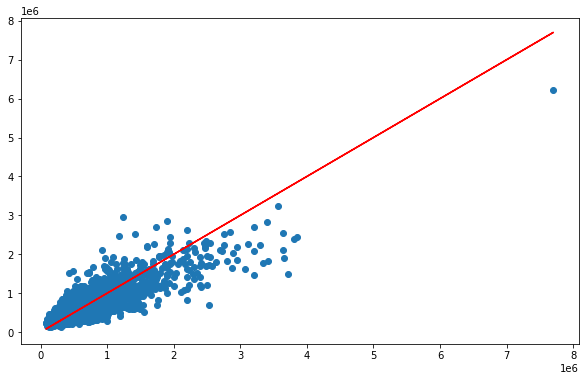

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_xgb)
plt.plot(y_test,y_test,color='red')

In [ ]:
print('Decision Tree Regressor: ',round(score_dtr,3), '->', 'Rmse_DTR: ',rmse_dtr)
print('Random Forrest Regressor: ', round(score_rfr,3), '->', 'Rmse_RFR: ',rmse_rfr)
print('XGBOOST Regressor: ', round(score_xgb,3),'Rmse_XGB:','->',rmse_xgb)
print('Polynomial Regressor: ', round(score_poly,3),'->','Rmse_POLY: ',rmse_poly)
print('Linear Regression: ', round(score_lr,3),'Rmse_LR: ','->',rmse_lr)
print('KNN Regressor: ', round(score_knr,3),'Rmse_KNN: ','->',rmse_knr)

Decision Tree Regressor:  0.999 -> Rmse_DTR:  265916.24886469945
Random Forrest Regressor:  0.958 -> Rmse_RFR:  194711.70232548064
XGBOOST Regressor:  0.902 Rmse_XGB: -> 195584.73115701115
Polynomial Regressor:  0.757 -> Rmse_POLY:  30917614.988717988
Linear Regression:  0.607 Rmse_LR:  -> 234146.10296834935
KNN Regressor:  0.59 Rmse_KNN:  -> 262994.8137385662


**Here Decision Tree gave us a 99% score, the Random Forest Regressor dos algorithm gave a lower score, 95%, however the mean square error was lower than Decision tree. In that case it will depend on what the analyst looks for in relation to the data and whether this average value will be and well above what he wants or enough enough for the insight of his business.**